In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
df = pd.read_csv('../data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
(df.isna().sum() / len(df)) * 100

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [11]:
df = df.drop(columns=['Comments'])

KeyError: "['Comments'] not found in axis"

In [12]:
(df.isna().sum() / len(df)) * 100

Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
dtype: float64

In [13]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))
outliers = (z_scores > 3)
outlier_counts = outliers.sum()
outlier_counts


np.int64(10526)

In [14]:
outlier_counts_per_column = outliers.sum(axis=0)
outlier_counts_per_column


array([  89,    0, 3738,   27,   63, 3109, 3500])

In [15]:
for i, col in enumerate(cols):
    median_value = df[col].median()
    df.loc[outliers[:, i], col] = median_value


In [16]:
outlier_counts_per_column = outliers.sum(axis=0)
outlier_counts_per_column

array([  89,    0, 3738,   27,   63, 3109, 3500])

In [17]:
outlier_counts_after = np.abs(stats.zscore(df[cols], nan_policy='omit')) > 3
outlier_counts_after.sum(axis=0)


array([   1,    0, 1932,    0,    0, 1133,  828])

In [19]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill missing values in those columns with their median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [20]:
outlier_counts_after = np.abs(stats.zscore(df[cols], nan_policy='omit')) > 3
outlier_counts_after.sum(axis=0)

array([   1,    0, 1932,    0,    0, 1133,  828])

In [22]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


C:\Users\teshi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


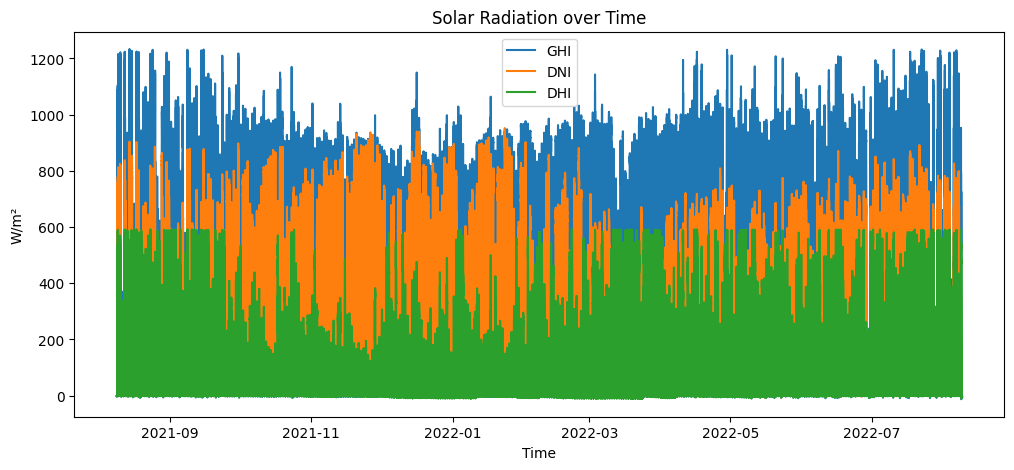

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.legend()
plt.title('Solar Radiation over Time')
plt.xlabel('Time')
plt.ylabel('W/m²')
plt.show()


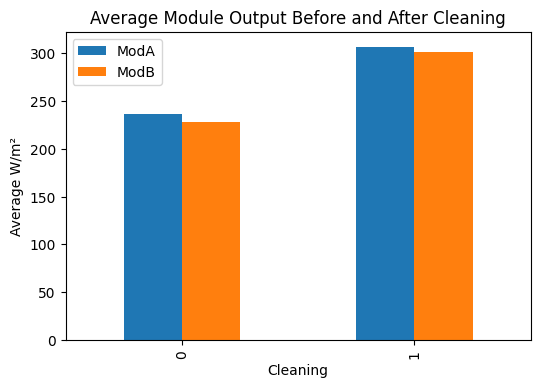

In [24]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', figsize=(6,4))
plt.title('Average Module Output Before and After Cleaning')
plt.ylabel('Average W/m²')
plt.show()


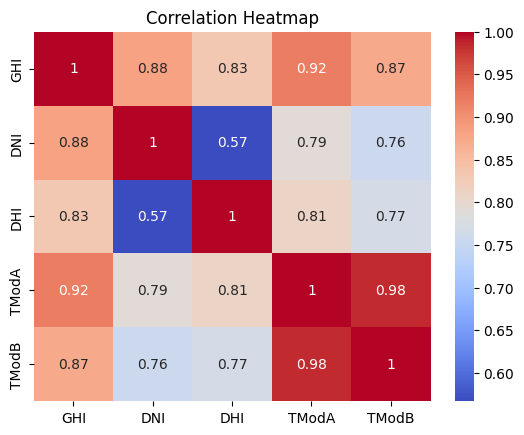

In [25]:
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


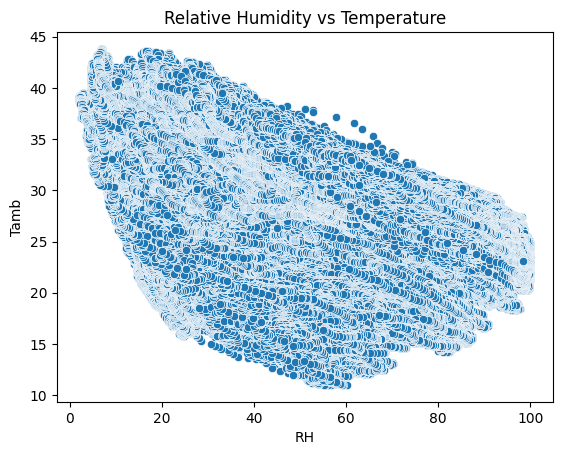

In [26]:
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity vs Temperature')
plt.show()


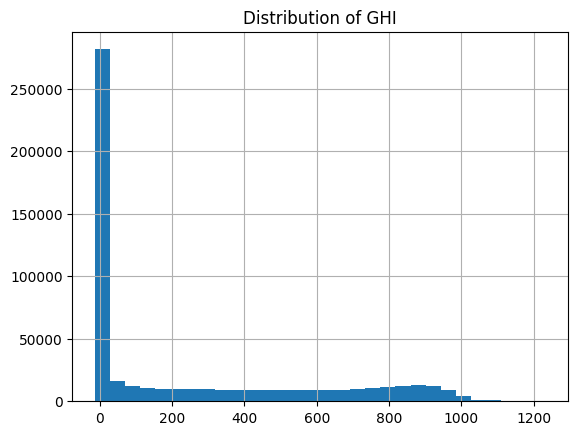

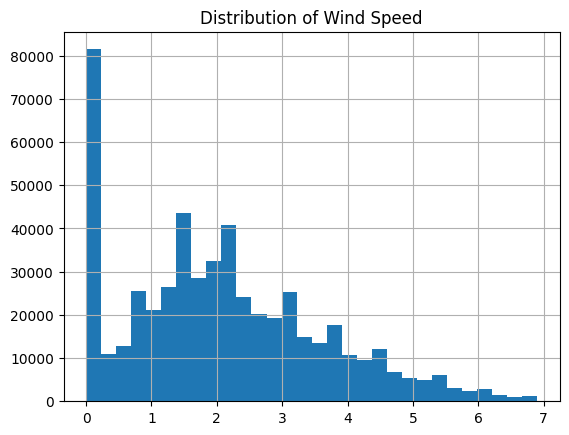

In [27]:
df['GHI'].hist(bins=30)
plt.title('Distribution of GHI')
plt.show()

df['WS'].hist(bins=30)
plt.title('Distribution of Wind Speed')
plt.show()


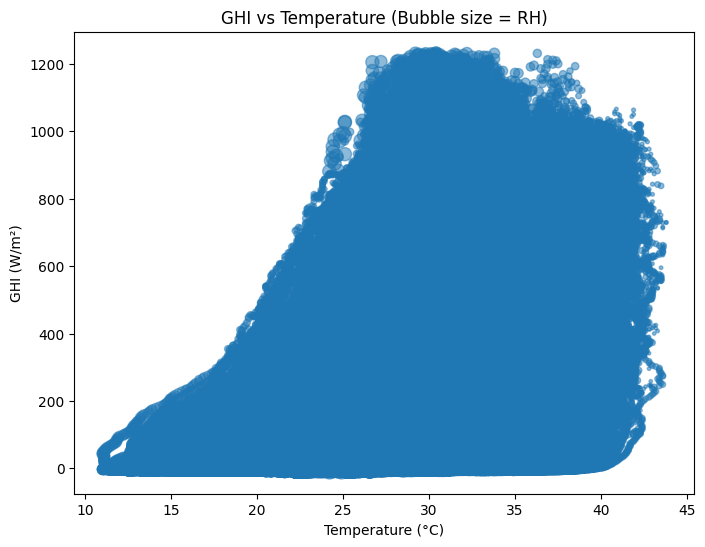

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Temperature (Bubble size = RH)')
plt.show()


In [30]:
df.to_csv('../data/benin_clean.csv', index=False)
